In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import StandardScaler

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource#, LabelSet
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
output_notebook()

plt.style.use('ggplot')
sns.set(style="white")

Loading BokehJS ...

In [2]:
df = pd.read_csv('../data/telecom_churn.csv')

In [3]:
df['International plan'] = (df['International plan'] == 'Yes').astype('int')
df['Voice mail plan'] = (df['Voice mail plan'] == 'Yes').astype('int')

In [4]:
data = df.drop(['Churn', 'State'], axis=1)

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## For reference: t-SNE

In [6]:
%%time
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(
    n_components=2, 
    #init='pca', 
    random_state=3, 
    method='barnes_hut',
    n_iter=1000, 
    verbose=20,
    n_jobs=4,
    #perplexity=30,
    #early_exaggeration=4.0,
    #learning_rate=1000 
)

tsne = tsne.fit_transform(data_scaled)
X = tsne[:, 0]
Y = tsne[:, 1]

CPU times: user 18 s, sys: 337 ms, total: 18.3 s
Wall time: 9.6 s


In [7]:
def bokeh_plot(X, Y):
    color_mapping = {
        False: 'Green',
        True: 'Red', 

    }

    source = ColumnDataSource(
        data=dict(
            x=X,
            y=Y,
            churn=df['Churn'],
            colors=[color_mapping[p] for p in list(df['Churn'])],
#             loyal=df['Churn'],
        )
    )

    hover = HoverTool(
        tooltips=[
            ("churn", "@churn"),
#             ("loyal", "@loyal"),
        ]
    )

    tools = "resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select,lasso_select"
    p = figure(tools=[hover, tools])
    p.scatter(
        x='x', 
        y='y', 
        fill_color='colors', 
        size=6, 
        fill_alpha=0.6, 
        line_color=None, 
        source=source
    )
    
    plt.plot(X, Y, 'o')

    show(p)

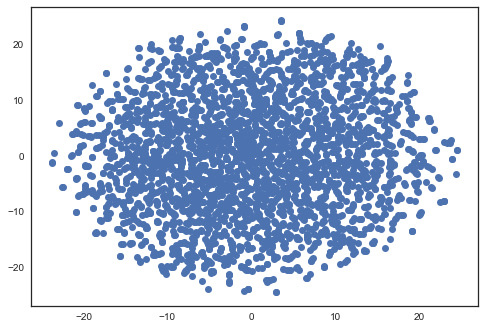

In [8]:
bokeh_plot(X, Y)

## Do it with umap

In [9]:
import umap

CPU times: user 11.6 s, sys: 145 ms, total: 11.7 s
Wall time: 10.7 s


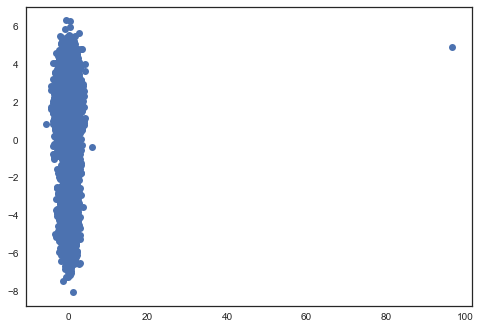

In [10]:
%%time
embedding = umap.UMAP(
    
    n_neighbors=50,
    n_components=2,
    gamma=1.0,
    n_edge_samples=None,
    alpha=1.0,
    init='spectral',
    spread=1.0,
    min_dist=0.25,
    a=None,
    b=None,
    oversampling=3
    
).fit_transform(data_scaled)

bokeh_plot(embedding[:, 0], embedding[:, 1])

## Is `digits` from readme working?

CPU times: user 6.41 s, sys: 89.7 ms, total: 6.5 s
Wall time: 5.57 s


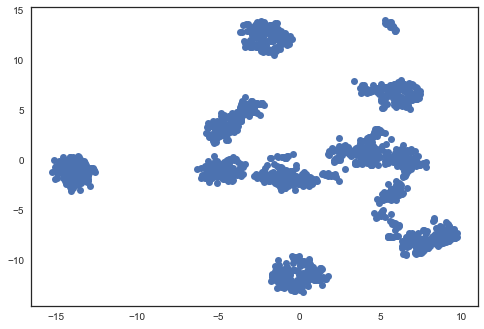

In [11]:
%%time
from sklearn.datasets import load_digits
digits = load_digits()

embedding = umap.UMAP(
    
    n_neighbors=50,
    n_components=2,
    gamma=1.0,
    n_edge_samples=None,
    alpha=1.0,
    init='spectral',
    spread=1.0,
    min_dist=0.25,
    a=None,
    b=None,
    oversampling=3
    
).fit_transform(digits.data)

plt.plot(embedding[:, 0], embedding[:, 1], 'o');